# **Bike Sharing Dataset  - Utku Elagoz**

## Part 1

### Task A: Explorative Data Analysis

#### Data preparation for analysis

In [100]:
# Necessarry imports for data analysis
# Please run !pip install -r reqirements.txt for missing modules.

import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Loading the dataset to environment

path_input_folder = "bike+sharing+dataset"
path_dataset = 'hour.csv'
path_input_csv = os.path.join(path_input_folder, path_dataset) # Controlling the paths(folders,files, etc.) inside the code is always a good practice.

start_time = time.time()
df_init = pd.read_csv(path_input_csv) #inital dataset
end_time = time.time()

elapsed_time = end_time - start_time

df = df_init.copy(deep=True)

print(f"Time taken to read the dataset: {elapsed_time:.2f} seconds.")
print(df.shape)
df.head(5)

Time taken to read the dataset: 0.02 seconds.
(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# After initial examination, it is clear that instant and dteday do not serve much to our prediction task and consume space. Therefore, I will drop them.
# Moreover, the casual and registered rentals should also be dropped, because these columns represent components of the target variable (cnt).
# Including them can lead to an overfitted model.

df.drop(['dteday', 'instant', 'casual', 'registered'], axis=1,inplace=True)

# Some categorical data is represented with numbers such as season and weathersit, which reduces the readability of the dataset. For ease of use I will rename some of them.

# **IMPORTANT**: in the dataset explanation in readme. it has been said season 1 is spring,
# but it contradicts with dteday column. ie: dteday = 2011-01-01 and season = 1 is in the same row in the dataset.
# One can run multiple df.sample(10) and check different instances. Therefore I will continue with my self-corrected version. 

rename_dict_season = {1:'winter',2:'spring',3:'summer',4:'fall'} 
rename_dict_weekday = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} # 0 -> Monday is not intuitive therefore it is a subject to change. No need for chaging the month column.
rename_dict_weathersit = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'} # only the first instances in the read.me dataset characteristics.
rename_dict_year = {0:'2011', 1: '2012'}


df['season'] = df['season'].map(rename_dict_season)
df['weathersit'] = df['weathersit'].map(rename_dict_weathersit)
df['weekday'] = df['weekday'].map(rename_dict_weekday)
df['yr'] = df['yr'].map(rename_dict_year)

df.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,winter,2011,1,0,0,Sun,0,Clear,0.24,0.2879,0.81,0.0,16
1,winter,2011,1,1,0,Sun,0,Clear,0.22,0.2727,0.80,0.0,40
2,winter,2011,1,2,0,Sun,0,Clear,0.22,0.2727,0.80,0.0,32
3,winter,2011,1,3,0,Sun,0,Clear,0.24,0.2879,0.75,0.0,13
4,winter,2011,1,4,0,Sun,0,Clear,0.24,0.2879,0.75,0.0,1


In [4]:
# sanity checks for the data:

print(df.isnull().sum()) # checking the null data, no null data found!

print((df['yr'].value_counts())/24)
# expected value of (year value counts)/24 is 366 for 2012(leap year) and 365 for 2011. 
# the results are close enough to continue the prediction.
# After a further detailed inpection, I detected the dates of the missing time data.
# Closest example: "02-01-2011, 05 am" data is missing.


season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
2012    363.916667
2011    360.208333
Name: yr, dtype: float64


In [5]:
# For better correlation and categorical analysis, I change some of the columns data types to categorical
# It brings an extra hot encoding step for the training, therefore I am also keeping the initial dataframe d_init.
# d_init will be used for training since it does not need the extra process.

categorical_cols = ['season','mnth','yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']

for col in categorical_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(1)
memory usage: 817.0 KB


#### Descriptive statistics

In [6]:
df.describe().round(3) # only for non-category columns.

,temp,atemp,hum,windspeed,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000
mean,0.497,0.476,0.627,0.190,189.463
std,0.193,0.172,0.193,0.122,181.388
min,0.020,0.000,0.000,0.000,1.000
25%,0.340,0.333,0.480,0.104,40.000
50%,0.500,0.485,0.630,0.194,142.000
75%,0.660,0.621,0.780,0.254,281.000
max,1.000,1.000,1.000,0.851,977.000


#### Time Series Analysis

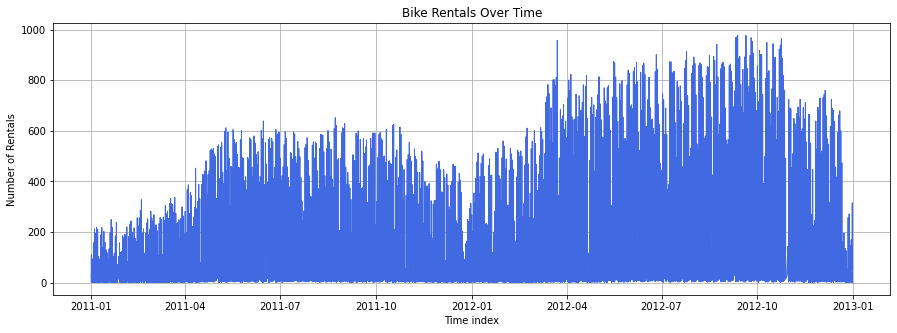

In [7]:
# Bike rentals in the two year span

plt.figure(figsize=(15, 5))
plt.plot(pd.to_datetime(df_init['dteday']), df_init['cnt'],color='royalblue', linewidth=1)
plt.title('Bike Rentals Over Time')
plt.xlabel('Time index')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Number of Rentals')

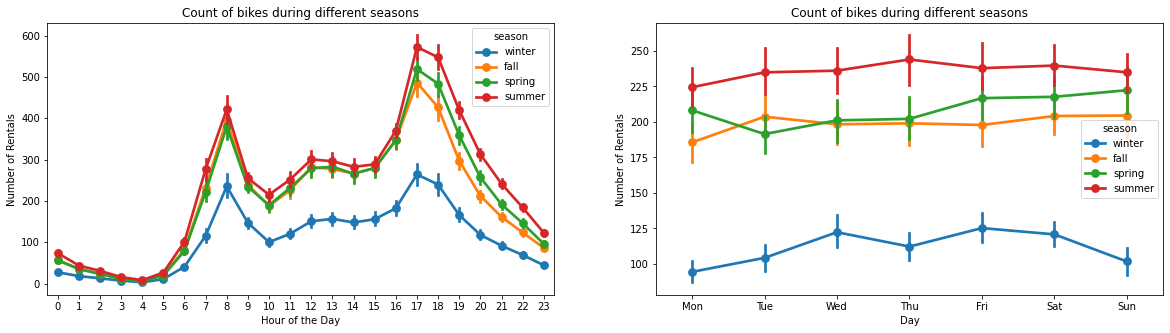

In [60]:
# Bike rentals seasonal inspection

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

hue_order=['winter', 'fall', 'spring', 'summer']
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.pointplot(data=df, x='hr', y='cnt', hue='season', ax=ax[0], hue_order=hue_order)
ax[0].set(title='Count of bikes during different seasons')
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Number of Rentals')

sns.pointplot(data=df, x='weekday', y='cnt', hue='season', ax=ax[1],order=weekday_order, hue_order=hue_order)
ax[1].set(title='Count of bikes during different seasons')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Rentals')

# Clear drop in winters 

Text(0, 0.5, 'Number of Rentals')

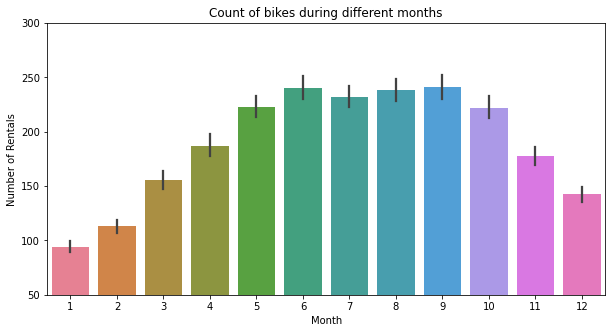

In [86]:
# Bike rentals monthly inspection

color_palette = sns.color_palette("husl", len(df['mnth'].unique()))

fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(50,300) # to indicate the relationship clearly.
sns.barplot(data=df, x='mnth', y='cnt', ax=ax,  palette=color_palette, hue= 'mnth' , legend= False, )
ax.set(title='Count of bikes during different months')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Rentals')

Text(0, 0.5, 'Number of Rentals')

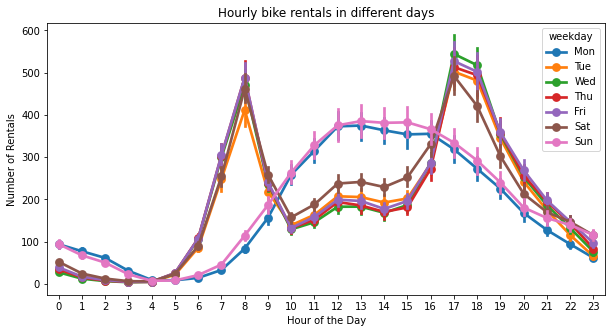

In [55]:
# Bike rentals Day - Hour inspection

fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday', hue_order=weekday_order, ax=ax)
ax.set(title='Hourly bike rentals in different days')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Rentals')
# clear relationship for weekend-leasure times and weekdays rush-hour times.

#### Weather and Temperature Analysis

Text(0, 0.5, 'Number of Rentals')

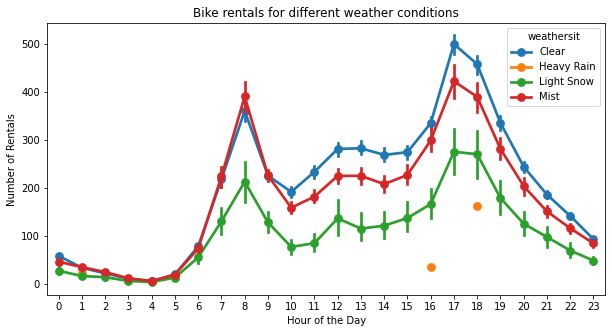

In [72]:
# Bike rentals weather inspection

fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit', ax=ax)
ax.set(title='Bike rentals for different weather conditions')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Rentals')
# almost no rental in heavy rain.


Text(0, 0.5, 'Number of Rentals')

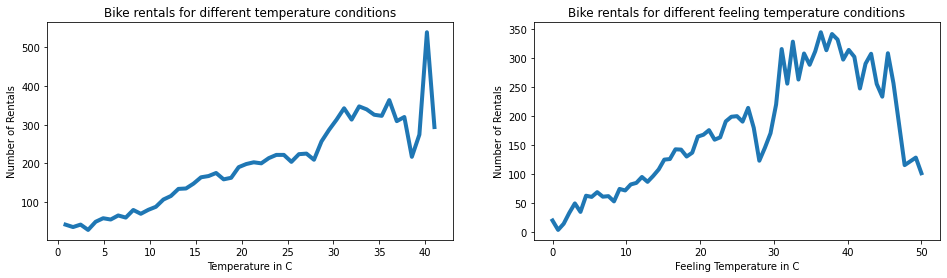

In [199]:
# Bike rentals temperature and feeling temperature inspection
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

sns.lineplot(data=df, x=df.temp*41, y='cnt', ax=ax[0], errorbar=None, linewidth = 4) # Temperature is normalized in the dataset.
ax[0].set(title='Bike rentals for different temperature conditions')
ax[0].set_xlabel('Temperature in C')
ax[0].set_ylabel('Number of Rentals')

sns.lineplot(data=df, x=df.atemp*50, y='cnt', ax=ax[1], errorbar=None, linewidth = 4) # Feeling Temperature is normalized in the dataset.
ax[1].set(title='Bike rentals for different feeling temperature conditions')
ax[1].set_xlabel('Feeling Temperature in C')
ax[1].set_ylabel('Number of Rentals')

# Rentals rises with temperature until it is become too hot.

#### Distribution Analysis and Outlier Detection

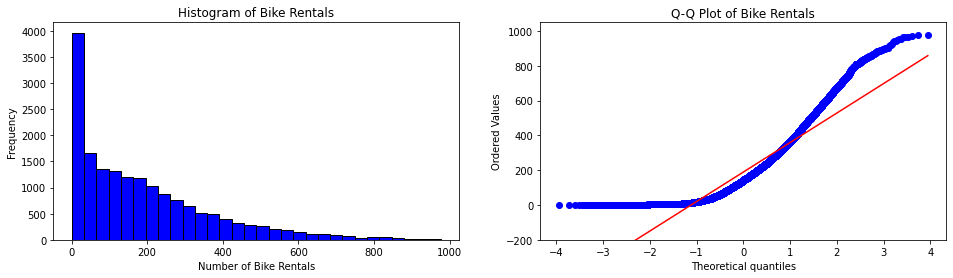

In [131]:
# There exist different methods for outlier detection, such as visual inspection, Z-Score, IQR (Interquartile Range), and isolation forest.
# To decide which method is more suitable, we can inspect the distribution characteristics of the 'cnt' in the dataset.
# Histogram and qq plots are useful for this task.

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot the histogram on the first subplot
ax[0].hist(df['cnt'], bins=30, color='blue', edgecolor='black')
ax[0].set_title('Histogram of Bike Rentals')
ax[0].set_xlabel('Number of Bike Rentals')
ax[0].set_ylabel('Frequency')

# Plot the Q-Q plot on the second subplot
stats.probplot(df['cnt'], dist='norm', plot=ax[1])
ax[1].set_ylim(bottom=-200)
ax[1].set_title('Q-Q Plot of Bike Rentals')

plt.show()

Shape of the dataset prior to outlier elimination: (17379, 14)
Shape of the dataset prior to outlier elimination: (16511, 14)


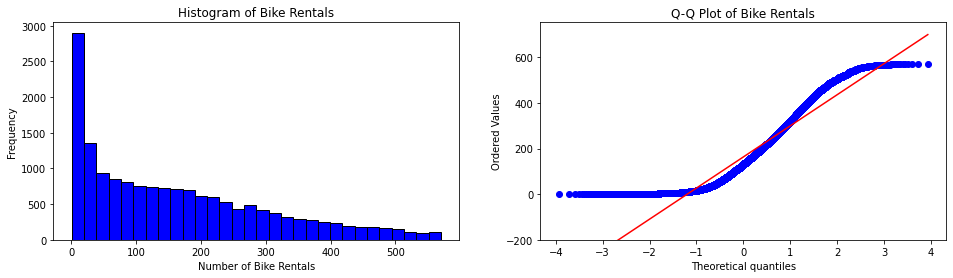

In [138]:
# since the data is not normally distributed and exhibit skewness (right skewed histogram), using isolation forest seems suitable.

from sklearn.ensemble import IsolationForest

X = df[['cnt']]

model = IsolationForest(contamination=0.05)  # Contamination is decided via trial-error!
outliers_iso = model.fit_predict(X)

outlier_indices = df.index[outliers_iso == -1].tolist()

df_no_outliers = df.drop(outlier_indices)

print(f"Shape of the dataset prior to outlier elimination: {df.shape}")
print(f"Shape of the dataset prior to outlier elimination: {df_no_outliers.shape}")

#Plotting the histogram and qq plot again
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].hist(df_no_outliers['cnt'], bins=30, color='blue', edgecolor='black')
ax[0].set_title('Histogram of Bike Rentals')
ax[0].set_xlabel('Number of Bike Rentals')
ax[0].set_ylabel('Frequency')

stats.probplot(df_no_outliers['cnt'], dist='norm', plot=ax[1])
ax[1].set_ylim(bottom=-200)
ax[1].set_title('Q-Q Plot of Bike Rentals')

plt.show()


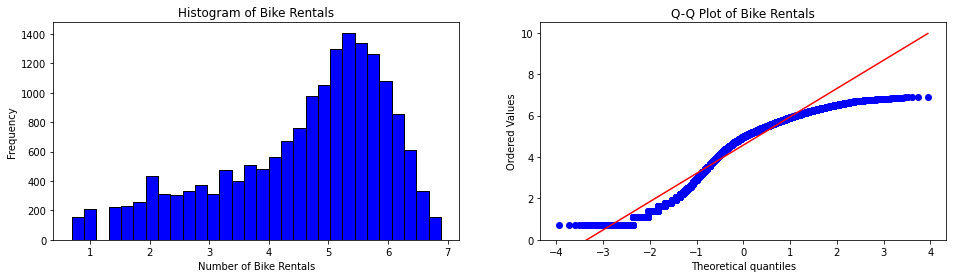

In [140]:
# Although it trimmed significant amount of data, the distribution is still not balanced.
# Removing further outliers may disturb the correctness of the prediction model.
# Another important method for right skewed data is using Log transform.

df['cnt_log'] = np.log1p(df['cnt'])

#Plotting the histogram and qq plot again

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].hist(df['cnt_log'], bins=30, color='blue', edgecolor='black')
ax[0].set_title('Histogram of Bike Rentals')
ax[0].set_xlabel('Number of Bike Rentals')
ax[0].set_ylabel('Frequency')

stats.probplot(df['cnt_log'], dist='norm', plot=ax[1])
ax[1].set_ylim(bottom=0)
ax[1].set_title('Q-Q Plot of Bike Rentals')

plt.show()

# Althoug it is not a close-perfect normal distribution. It is still better than the initial distribution.

#### Correlation Analysis:

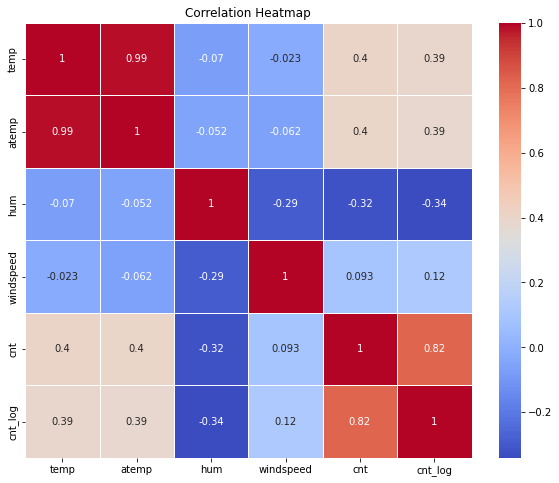

In [143]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# There is a very strong positive correlation between temp and atemp.
# Windspeed has a very little correlation with bike rentals.
# cnt_log and log has similar correlation characteristics with other variables, which is good and expected.


### Task B: Building a Prediction Model

In [186]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from math import sqrt

features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp','hum'] #features to be used in model training
X = df_init[features] # using the initial df is important! explained in first cell.
y = df['cnt_log'] # target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# grid search is strong method for optimizing the hyperparameters. 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# These are the best parameters from grid search, uncomment the line for directly using them.

# best_params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9} 
best_model = XGBRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

# Result metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, predictions)

print("XGBoost Model:")
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance Score (R^2): {r2}')


XGBoost Model:
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}
Mean Squared Error: 0.08149278228311894
Mean Absolute Error: 0.19303634878349568
Root Mean Squared Error: 0.28546940691275297
Explained Variance Score (R^2): 0.9586199017997512


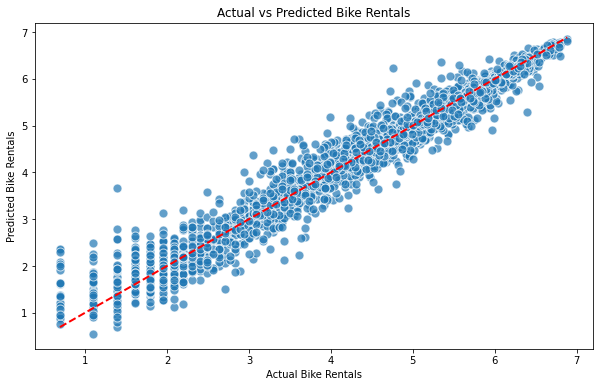

In [190]:
# Visualize predicted vs actual values

plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions, alpha=0.7, edgecolors='w', s=80, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals')

plt.show()

# still the 0 values are the main problem for accuracy.


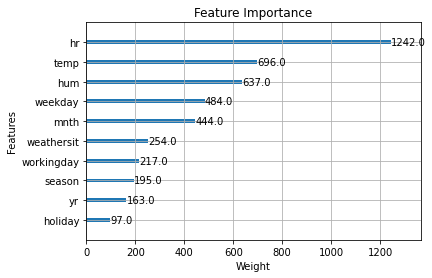

In [194]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_model, importance_type='weight', title='Feature Importance', xlabel='Weight', ylabel='Features')
plt.show()

# feature importance is very cruical for business to adjust their strategies.
# For a client, adjusting their rental bike supplies mainly according to the holiday data would be a mistake.